In [158]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Get S&P 500 data from yfinance library and visualize it

In [178]:
import yfinance as yf

sp500 = yf.Ticker('^GSPC')
historical_data = sp500.history(start='2000-01-01', end='2024-06-11')
closing_data = historical_data['Close']

closing_data = closing_data.asfreq('B')
closing_data = closing_data.fillna(method='ffill')

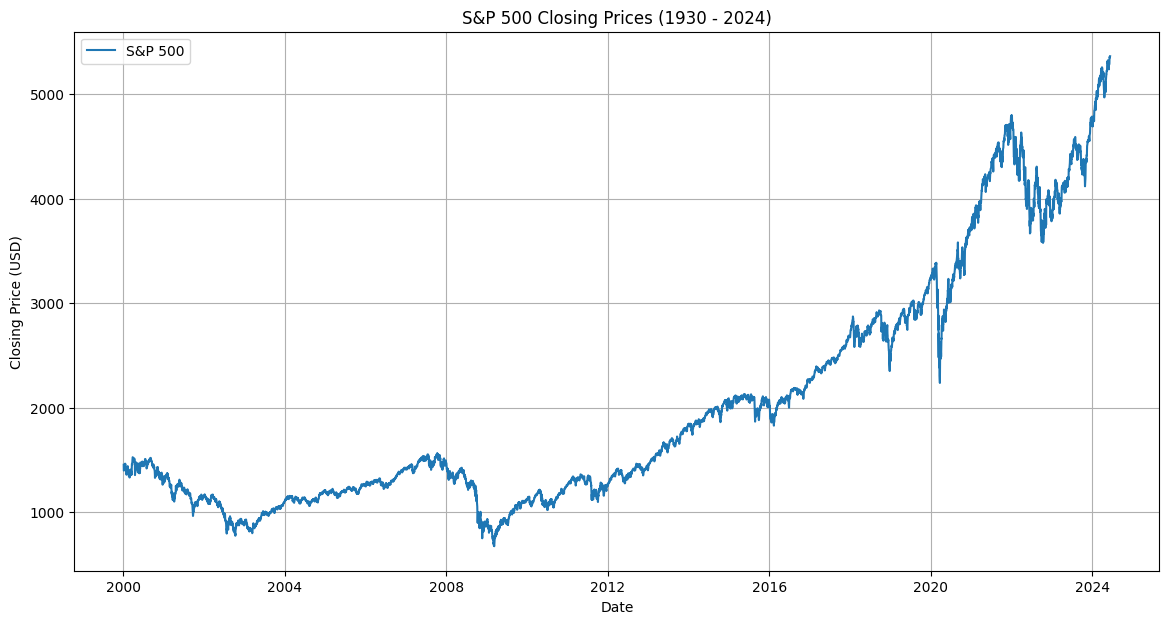

In [179]:
plt.figure(figsize=(14, 7))
plt.plot(closing_data.index, closing_data, label='S&P 500')
plt.title('S&P 500 Closing Prices (1930 - 2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [209]:
num_testing = 14 # 2 tedna
num_training = len(closing_data) - num_testing
train_data, test_data = closing_data[:num_training], closing_data[num_training:]

In [210]:
from pmdarima.arima.utils import ndiffs

ndiffs(train_data, test="adf")

1

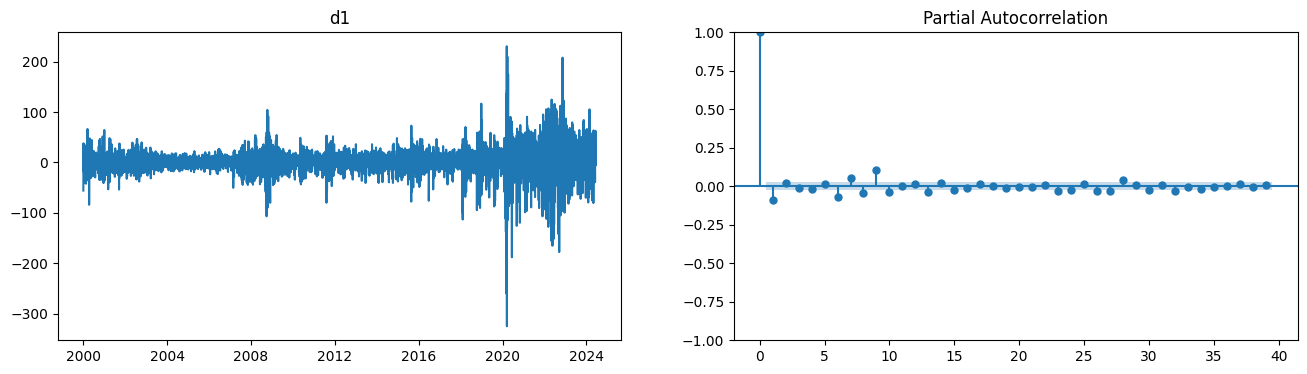

In [211]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = closing_data.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("d1")

ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

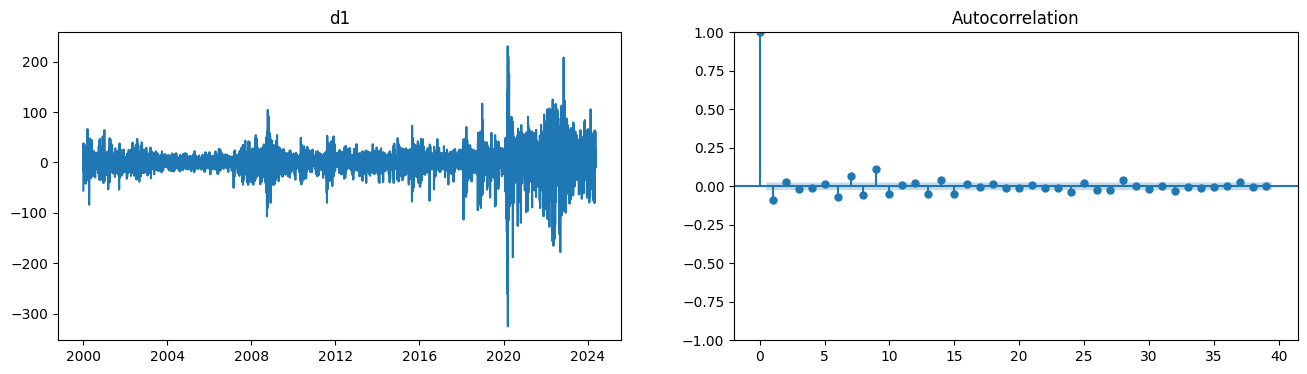

In [212]:
from statsmodels.graphics.tsaplots import plot_acf

diff = train_data.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("d1")

ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

Treniranje modela

In [213]:
p = 9
d = 1
q = 2

order = (p, d, q)

model = ARIMA(train_data, order=order)
fitted = model.fit()

In [214]:
predictions = fitted.forecast(steps=num_testing)

In [215]:
mse = mean_squared_error(test_data, predictions)
print('MSE:', mse)
mae = mean_absolute_error(test_data, predictions)
print('MAE:', mae)
rmse = math.sqrt(mse)
print('RMSE:', rmse)

MSE: 1548.9506908018463
MAE: 34.80425998558966
RMSE: 39.35671087377407


Končna vizualizacija podatkov

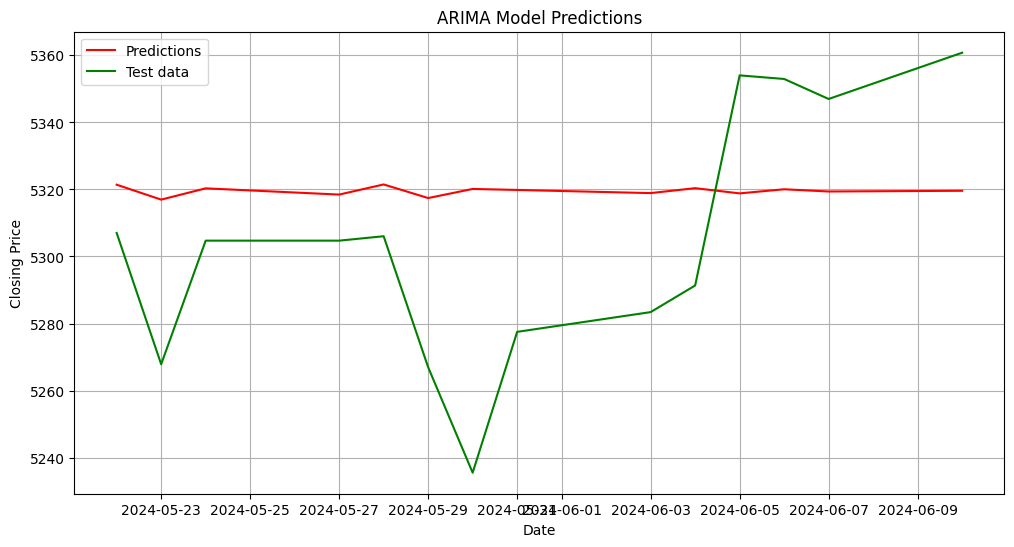

In [217]:
plt.figure(figsize=(12, 6))

# plt.plot(closing_data.index[:num_training], closing_data[:num_training], label='Training Data', color='blue')

plt.plot(closing_data.index[num_training:], predictions, label='Predictions', color='red')

plt.plot(closing_data.index[num_training:], test_data, label='Test data', color='green')

# Labels and title
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Add legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()